# Proyek Analisis Data: Bike Sharing Dataset
- **Nama: STEVEN GONAWAN
- **Email: xvgonst@gmail.com
- **ID Dicoding: steven_gonawan_NDxe

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Min dan Max peminjaman sepeda pada musim semi vs musim dingin per harinya lebih tinggi siapa?
- Pertanyaan 2: Apakah hari kerja memiliki peminjam terlisensi lebih banyak daripada hari libur?

## Import Semua Packages/Library yang Digunakan

In [6]:
import numpy as np
import pandas as pd
import matplotlib as plotter
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [7]:
#ambil data dari day.csv
days_data = pd.read_csv(r"C:\Users\steve\Downloads\submission\data\day.csv", delimiter=",")
days_data.sample(n = 5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
611,612,2012-09-03,3,1,9,1,1,0,1,0.707500,0.661629,0.790833,0.151121,1965,4069,6034
686,687,2012-11-17,4,1,11,0,6,0,1,0.325000,0.326383,0.545417,0.179729,1313,4316,5629
678,679,2012-11-09,4,1,11,0,5,1,1,0.361667,0.355413,0.540833,0.214558,709,5283,5992
513,514,2012-05-28,2,1,5,1,1,0,1,0.712500,0.679300,0.676250,0.196521,2557,3486,6043
454,455,2012-03-30,2,1,3,0,5,1,2,0.370000,0.375621,0.580833,0.138067,796,4663,5459


In [8]:
#ambil data dari hour.csv
hours_data = pd.read_csv(r"C:\Users\steve\Downloads\submission\data\hour.csv", delimiter=",")
hours_data.sample(n = 5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13552,13553,2012-07-23,3,1,7,21,0,1,1,1,0.76,0.7121,0.62,0.1940,45,251,296
7767,7768,2011-11-25,4,0,11,6,0,5,1,1,0.26,0.2727,0.81,0.1045,4,9,13
11669,11670,2012-05-06,2,1,5,10,0,0,0,2,0.54,0.5152,0.77,0.1045,112,221,333
14182,14183,2012-08-19,3,1,8,3,0,0,0,2,0.62,0.6061,0.61,0.1642,21,34,55
12324,12325,2012-06-02,2,1,6,17,0,6,0,1,0.64,0.6212,0.36,0.0000,248,338,586


**Insight:**
- Data yang diambil adalah day.csv dan hour.csv
- Untuk membaca kedua file tersebut, digunakan pd.read_csv()

### Assessing Data

In [9]:
#cek data duplikat untuk days_data
days_data.duplicated().sum()

0

In [10]:
#cek data null value untuk days_data
days_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
#cek data duplikat untuk hours_data
hours_data.duplicated().sum()

0

In [12]:
#cek data null value untuk hours_data
hours_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Mengecek apakah ada data duplikat atau null yang dapat dilihat tidak ada hasil duplikat atau null.
- gunakan .isnull() dan .duplicated() untuk mengecek.

### Cleaning Data

In [13]:
#drop kolom weathersit, temp, atemp, hum, windspeed pada filtered_days_data
filtered_days_data = days_data.drop(columns=["weathersit", "temp", "atemp", "hum", "windspeed"])
filtered_days_data.sample(n = 10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,casual,registered,cnt
38,39,2011-02-08,1,0,2,0,2,1,64,1466,1530
659,660,2012-10-21,4,1,10,0,0,0,2132,4692,6824
386,387,2012-01-22,1,1,1,0,0,0,196,1781,1977
137,138,2011-05-18,2,0,5,0,3,1,536,3319,3855
590,591,2012-08-13,3,1,8,0,1,1,1207,5676,6883
526,527,2012-06-10,2,1,6,0,0,0,2224,4374,6598
504,505,2012-05-19,2,1,5,0,6,0,3410,4884,8294
141,142,2011-05-22,2,0,5,0,0,0,1576,3084,4660
15,16,2011-01-16,1,0,1,0,0,0,251,953,1204
464,465,2012-04-09,2,1,4,0,1,1,905,4680,5585


In [14]:
#konversi dteday yang (####) menjadi format date-time yang benar untuk filtered_days_data
#asal:
print(filtered_days_data["dteday"].dtype)

#akhir:
filtered_days_data["dteday"] = pd.to_datetime(filtered_days_data["dteday"])
filtered_days_data.sample(n=10)
print(filtered_days_data["dteday"].dtype)

object
datetime64[ns]


In [15]:
#drop kolom weathersit, temp, atemp, hum, windspeed pada filtered_days_data
filtered_hours_data = hours_data.drop(columns=["weathersit", "temp", "atemp", "hum", "windspeed"])
filtered_hours_data.sample(n = 10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,casual,registered,cnt
2855,2856,2011-05-03,2,0,5,21,0,2,1,42,183,225
8946,8947,2012-01-13,1,1,1,15,0,5,1,15,123,138
9614,9615,2012-02-10,1,1,2,13,0,5,1,22,170,192
14241,14242,2012-08-21,3,1,8,14,0,2,1,110,192,302
7402,7403,2011-11-10,4,0,11,1,0,4,1,1,10,11
630,631,2011-01-29,1,0,1,13,0,6,0,9,56,65
3124,3125,2011-05-15,2,0,5,2,0,0,0,13,37,50
6222,6223,2011-09-21,3,0,9,20,0,3,1,11,149,160
1180,1181,2011-02-21,1,0,2,23,1,1,0,0,2,2
10887,10888,2012-04-03,2,1,4,19,0,2,1,98,460,558


In [16]:
#konversi dteday yang (####) menjadi format date-time yang benar untuk filtered_hours_data
#asal:
print(filtered_hours_data["dteday"].dtype)

#akhir:
filtered_hours_data["dteday"] = pd.to_datetime(filtered_hours_data["dteday"])
filtered_hours_data.sample(n=10)
print(filtered_hours_data["dteday"].dtype)

object
datetime64[ns]


**Insight:**
1. Menghilangkan kolom yang tidak dipakai.
2. Memperbaiki dteday yang berbentuk objek (dikarenakan format salah) dan konversi jadi datetime64.

## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
#groupby() untuk filtered_days_data (pertanyaan no.1)
minmaxD_data = filtered_days_data.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min"]
})

#print
minmaxD_data

instant   cnt      
       nunique   max   min
season                    
1          181  7836   431
2          184  8362   795
3          188  8714  1115
4          178  8555    22

In [18]:
#groupby() untuk filtered_days_data (pertanyaan no.2)
borrowerD_data = filtered_days_data.groupby(by="workingday").agg({
    "instant": "nunique",
    "registered": "mean",
    "casual": "mean"
})

#print
borrowerD_data

,instant,registered,casual
workingday,,,
0,231,2959.034632,1371.134199
1,500,3978.250000,606.570000


In [19]:
#groupby() untuk filtered_hourss_data (pertanyaan no.1)
minmaxH_data = filtered_hours_data.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min"]
})

#print
minmaxH_data

instant  cnt    
       nunique  max min
season                 
1         4242  801   1
2         4409  957   1
3         4496  977   1
4         4232  967   1

In [20]:
#groupby() untuk filtered_hours_data (pertanyaan no.2)
borrowerH_data = filtered_hours_data.groupby(by="workingday").agg({
    "instant": "nunique",
    "registered": "mean",
    "casual": "mean"
})

#print
round(borrowerH_data)

,instant,registered,casual
workingday,,,
0,5514,124.0,57.0
1,11865,168.0,26.0


**Insight:**
- Untuk pertanyaan (1) diperlukan perbandingan antara peminjaman paling tinggi dan rendah (min/max) sedangkan pertanyaan (2) diperlukan mencari mean dari peminjam terlisensi dan peminjam kasual.
- Untuk ini, digunakan .groupby() dengan by="" tergantung kebutuhan yang menjadi anchor point atau dasar yang akan dibandingkan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

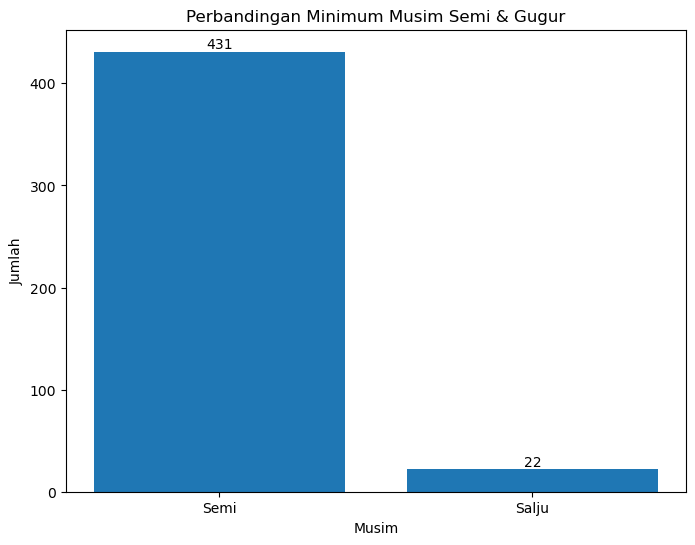

In [21]:
#store dalam value
filtered_min_values = minmaxD_data.loc[[1, 4], ("cnt", "min")]

#buat bar chart
plt.figure(figsize=(8, 6))
plt.bar(["Semi", "Salju"], filtered_min_values)

#dekorasi bar chart
for i, value in enumerate(filtered_min_values):
    plt.text(i, value + 0.1, str(round(value, 2)), ha="center", va="bottom")
plt.title("Perbandingan Minimum Musim Semi & Gugur")
plt.xlabel("Musim")
plt.ylabel("Jumlah")

#show bar
plt.show()


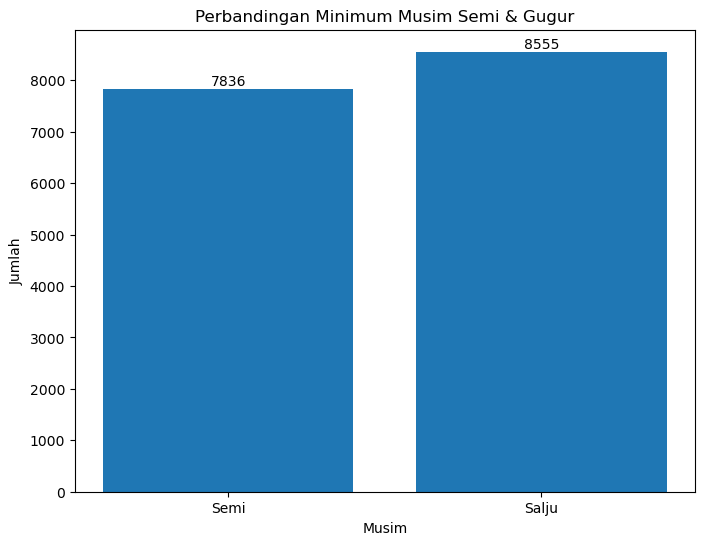

In [22]:
#store dalam value
filtered_min_values = minmaxD_data.loc[[1, 4], ("cnt", "max")]

#buat bar chart
plt.figure(figsize=(8, 6))
plt.bar(["Semi", "Salju"], filtered_min_values)

#dekorasi bar chart
for i, value in enumerate(filtered_min_values):
    plt.text(i, value + 0.1, str(round(value, 2)), ha="center", va="bottom")
plt.title("Perbandingan Minimum Musim Semi & Gugur")
plt.xlabel("Musim")
plt.ylabel("Jumlah")

#show bar
plt.show()

### Pertanyaan 2:

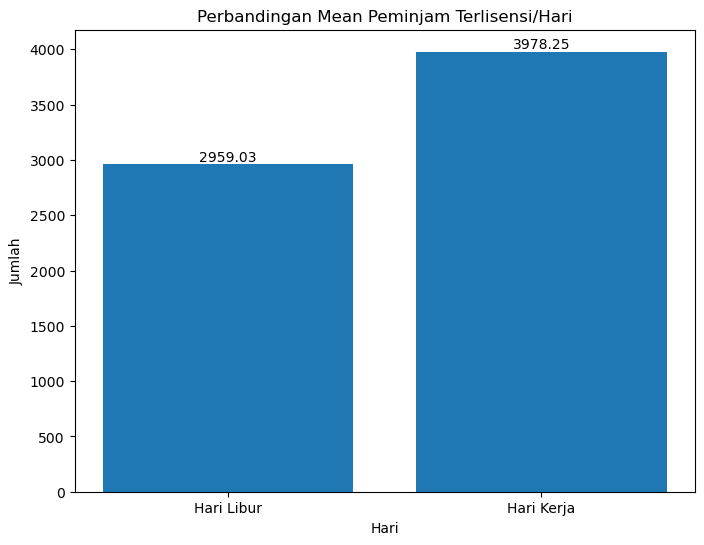

In [23]:
#store dalam value
filtered_borrower_values = borrowerD_data.loc[[0, 1], ("registered")]

#buat bar chart
plt.figure(figsize=(8, 6))
plt.bar(["Hari Libur", "Hari Kerja"], filtered_borrower_values)

#dekorasi bar chart
for i, value in enumerate(filtered_borrower_values):
    plt.text(i, value + 0.1, str(round(value, 2)), ha="center", va="bottom")
plt.title("Perbandingan Mean Peminjam Terlisensi/Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah")

#show bar
plt.show()

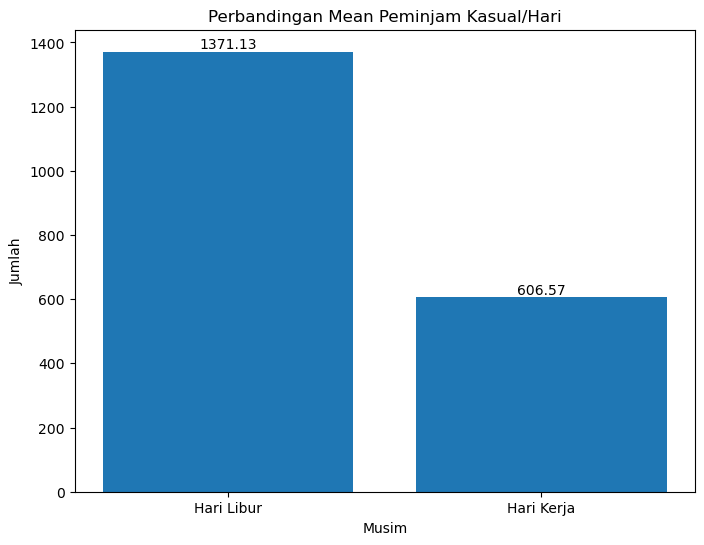

In [24]:
#store dalam value
filtered_borrower_values = borrowerD_data.loc[[0, 1], ("casual")]

#buat bar chart
plt.figure(figsize=(8, 6))
plt.bar(["Hari Libur", "Hari Kerja"], filtered_borrower_values)

#dekorasi bar chart
for i, value in enumerate(filtered_borrower_values):
    plt.text(i, value + 0.1, str(round(value, 2)), ha="center", va="bottom")
plt.title("Perbandingan Mean Peminjam Kasual/Hari")
plt.xlabel("Musim")
plt.ylabel("Jumlah")

#show bar
plt.show()

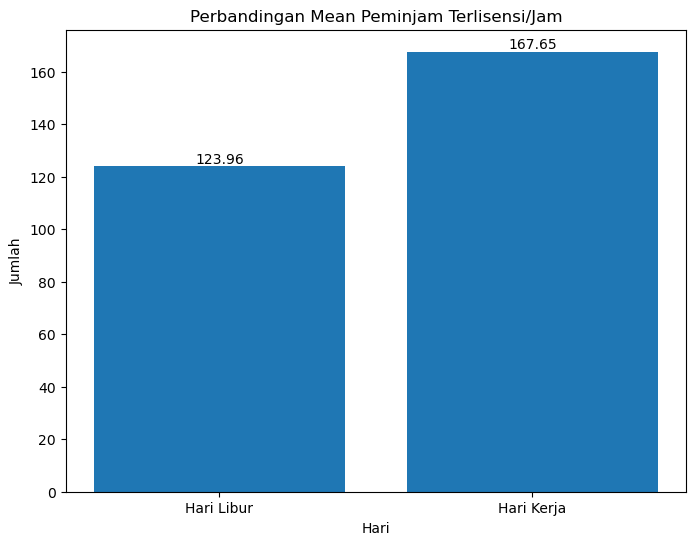

In [25]:
#store dalam value
filtered_borrower_values = borrowerH_data.loc[[0, 1], ("registered")]

#buat bar chart
plt.figure(figsize=(8, 6))
plt.bar(["Hari Libur", "Hari Kerja"], filtered_borrower_values)

#dekorasi bar chart
for i, value in enumerate(filtered_borrower_values):
    plt.text(i, value + 0.1, str(round(value, 2)), ha="center", va="bottom")
plt.title("Perbandingan Mean Peminjam Terlisensi/Jam")
plt.xlabel("Hari")
plt.ylabel("Jumlah")

#show bar
plt.show()

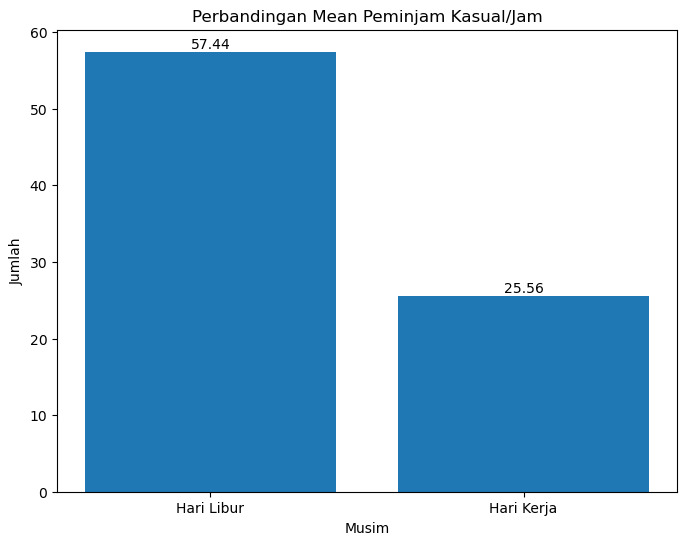

In [26]:
#store dalam value
filtered_borrower_values = borrowerH_data.loc[[0, 1], ("casual")]

#buat bar chart
plt.figure(figsize=(8, 6))
plt.bar(["Hari Libur", "Hari Kerja"], filtered_borrower_values)

#dekorasi bar chart
for i, value in enumerate(filtered_borrower_values):
    plt.text(i, value + 0.1, str(round(value, 2)), ha="center", va="bottom")
plt.title("Perbandingan Mean Peminjam Kasual/Jam")
plt.xlabel("Musim")
plt.ylabel("Jumlah")

#show bar
plt.show()

**Insight:**
- Untuk pertanyaan (1) tidak bisa menggunakan data hour.csv karena untuk menghitung min, diperlukan sebuah peminjaman yang dikalkulasikan lebih dari 1 karena setiap peminjaman mulai dari 1 sehingga hanya bisa menggunakan day.csv atau kesimpulan dari hour.csv yang dikompakkan. (instansi sebanyak n hari itu dibuat menjadi 1)
- Untuk pertanyaan (2) bisa menggunakan keduanya karena jika keduanya memiliki perbandingan yang sama. (misal x > y pada hour.csv, maka x > y juga lebih besar pada day.csv)

## Analisis Lanjutan (Opsional)

## Conclusion

- Pertanyaan (1): minimum musim salju lebih sedikit daripada minimum musim semi, sedangkan maksimum musim salju lebih besar daripada maksimum musim semi.
- Peminjam terlisensi pada hari kerja lebih banyak daripada peminjam kasual, sedangkan peminjam terlisensi pada hari libur lebih sedikit daripada peminjam kasual.